In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/NYPD_Arrests_Data__Historic_.csv


In [10]:
df = pd.read_csv("/kaggle/input/NYPD_Arrests_Data__Historic_.csv")

In [11]:
df.isna().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  284
PD_DESC               9066
KY_CD                 9066
OFNS_DESC             9066
LAW_CODE               196
LAW_CAT_CD           18861
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64

In [12]:
df['AGE_GROUP'] = pd.to_numeric(df['AGE_GROUP'], errors='coerce')

# Fill NaN values with the mean of the AGE_GROUP column
mean_age_group = df['AGE_GROUP'].mean()
df['AGE_GROUP'].fillna(mean_age_group, inplace=True)

/tmp/ipykernel_30/3186281434.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AGE_GROUP'].fillna(mean_age_group, inplace=True)


In [13]:
df.isna().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  284
PD_DESC               9066
KY_CD                 9066
OFNS_DESC             9066
LAW_CODE               196
LAW_CAT_CD           18861
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP                0
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64

In [14]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,946.855491,M,BLACK,NaN,NaN,NaN,NaN,NaN
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,946.855491,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
2,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,946.855491,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007)
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,946.855491,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035)
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,946.855491,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)


In [15]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5125619 entries, 1 to 5153368
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          float64
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(8), int64(2), object(9)
memory usage: 782.1+ MB


In [16]:
# Separating days, months and years and naming the month

df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], format='%m/%d/%Y')

df['day'] = df['ARREST_DATE'].dt.day
df['month'] = df['ARREST_DATE'].dt.strftime('%B')
df['year'] = df['ARREST_DATE'].dt.year

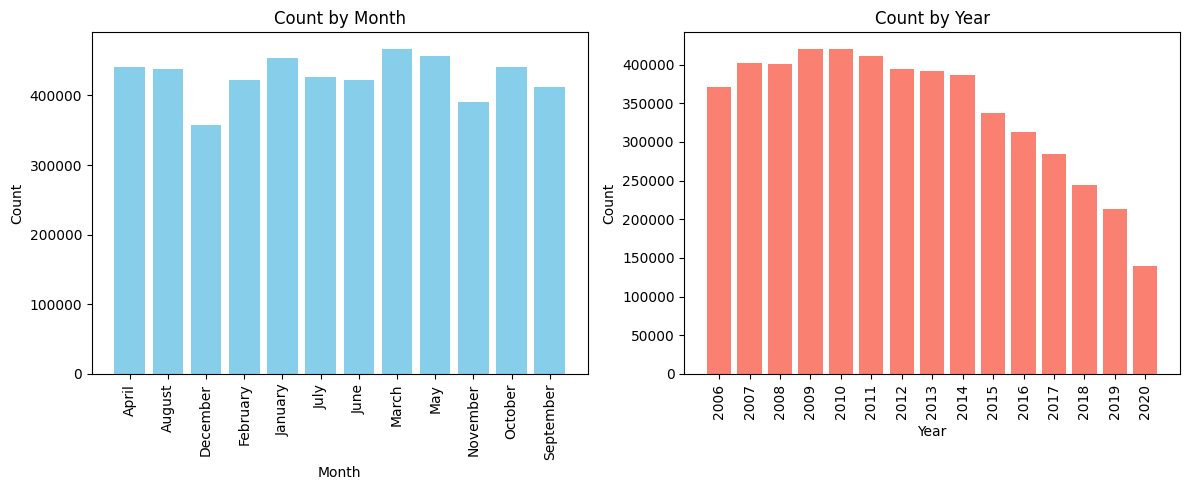

In [29]:
import matplotlib.pyplot as plt

# Count occurrences by month and year
month_counts = df['month'].value_counts().sort_index()
year_counts = df['year'].value_counts().sort_index()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for months
axes[0].bar(month_counts.index, month_counts.values, color='skyblue')
axes[0].set_title('Count by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

# Bar chart for years
axes[1].bar(year_counts.index.astype(str), year_counts.values, color='salmon')
axes[1].set_title('Count by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels by 90 degrees

plt.tight_layout()
plt.show()

In [30]:
import folium
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
import matplotlib.pyplot as plt

total_categories = df['OFNS_DESC'].nunique()

print("Total number of unique categories: ", total_categories)

Total number of unique categories:  86


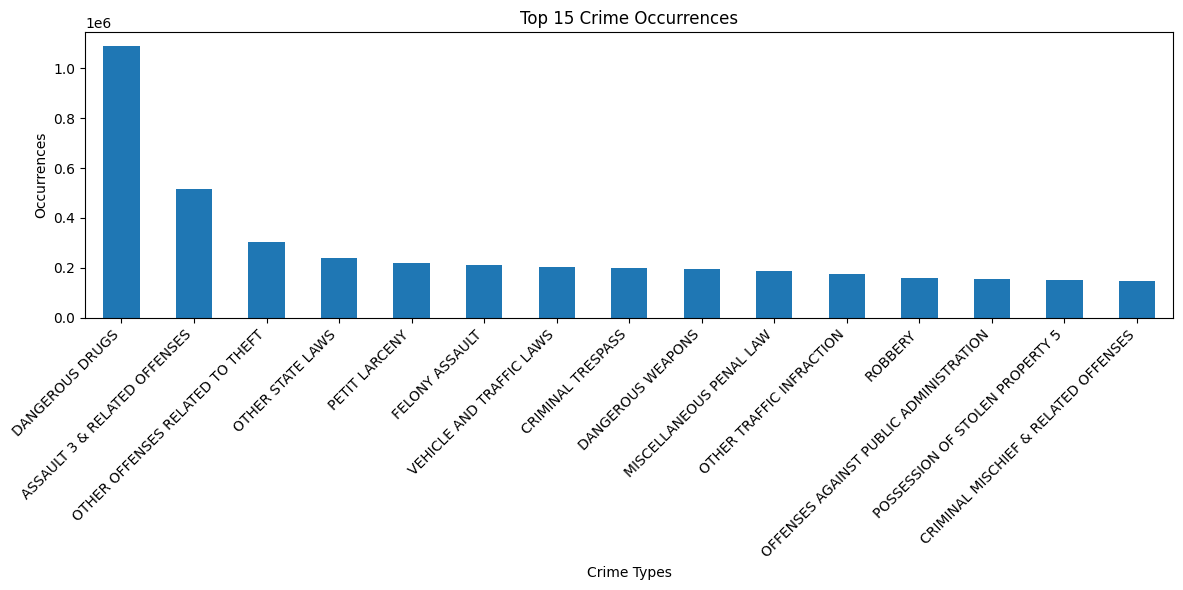

In [31]:
crime_counts = df['OFNS_DESC'].value_counts()
top_N = 15
top_crimes = crime_counts.head(top_N)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_crimes.plot(kind='bar')
plt.title('Top {} Crime Occurrences'.format(top_N))
plt.xlabel('Crime Types')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()


plt.show()

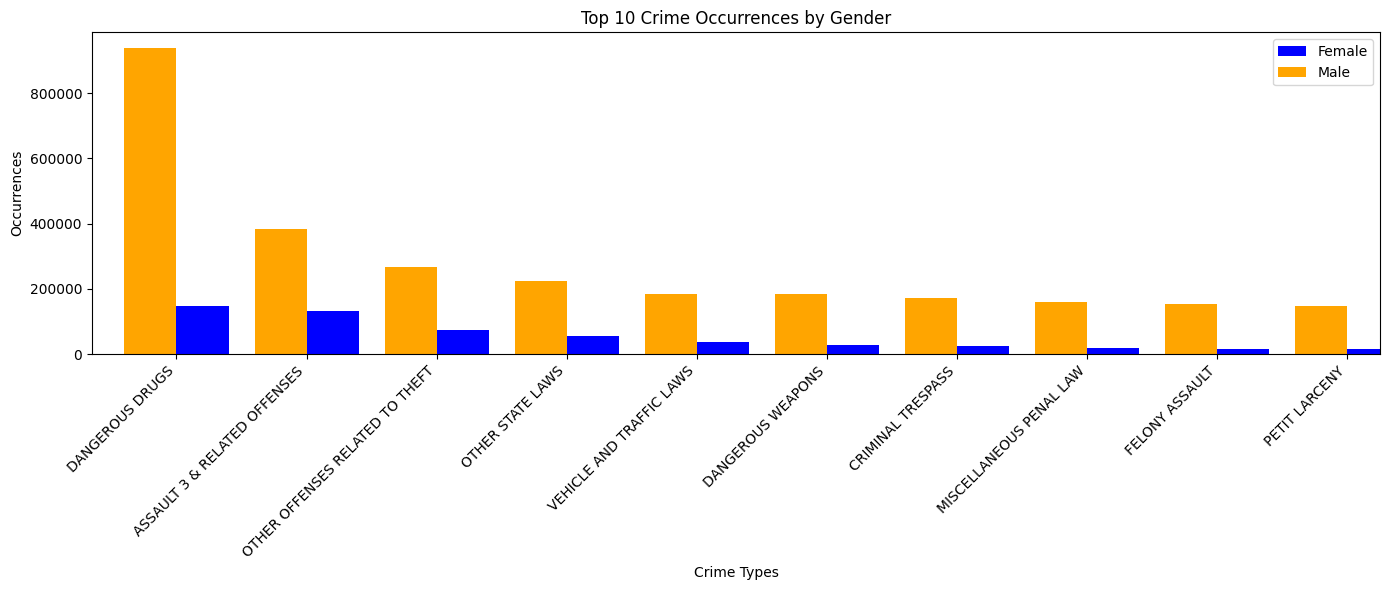

In [32]:
crime_gender_counts = df.groupby(['OFNS_DESC', 'PERP_SEX']).size().unstack(fill_value=0)

# Select the top 10 crime categories
top_10_crimes = crime_gender_counts.sum(axis=1).nlargest(10).index

# Filter the data to include only the top 10 categories
filtered_data = crime_gender_counts.loc[top_10_crimes]

# Create a side-by-side bar plot for the top 10 categories
plt.figure(figsize=(14, 6))

# Plot for Female (F)
filtered_data['F'].sort_values(ascending=False).plot(kind='bar', position=0, width=0.4, label='Female', color='blue')

# Plot for Male (M)
filtered_data['M'].sort_values(ascending=False).plot(kind='bar', position=1, width=0.4, label='Male', color='orange')

plt.title('Top 10 Crime Occurrences by Gender')
plt.xlabel('Crime Types')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

plt.tight_layout()
plt.show()


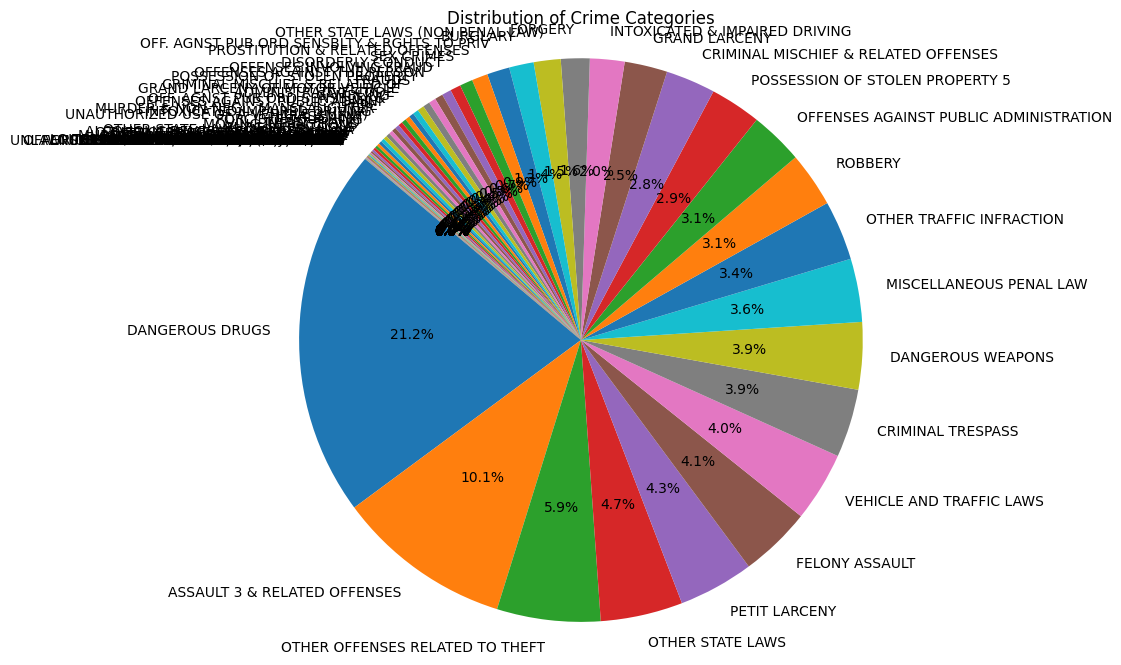

In [33]:

crime_counts = df['OFNS_DESC'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Categories')
plt.axis('equal') 
plt.show()


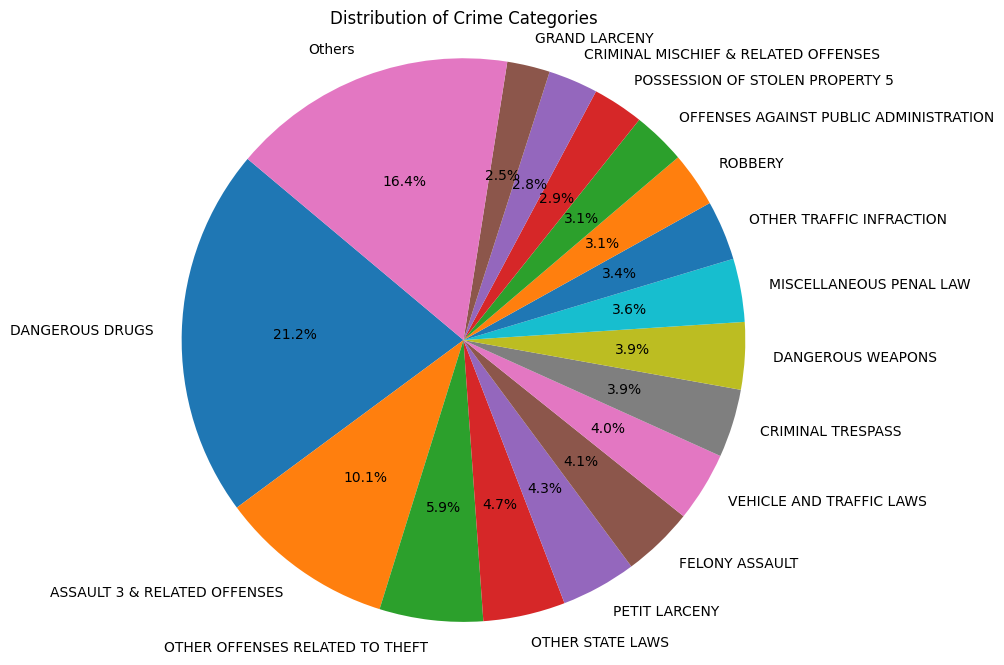

In [34]:
total_occurrences = len(df)

# for categories with less than 2% occurrence
threshold = 0.02 * total_occurrences
filtered_crimes = crime_counts[crime_counts >= threshold]

# Sum occurrences of the categories that didn't meet the threshold and label them as 'Others'
filtered_crimes['Others'] = crime_counts[crime_counts < threshold].sum()
plt.figure(figsize=(8, 8))
plt.pie(filtered_crimes, labels=filtered_crimes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Categories')
plt.axis('equal') 

plt.show()


In [35]:
race_counts = df['PERP_RACE'].value_counts()
race_counts

PERP_RACE
BLACK                             2489904
WHITE HISPANIC                    1331156
WHITE                              616990
BLACK HISPANIC                     412431
ASIAN / PACIFIC ISLANDER           211622
UNKNOWN                             50754
AMERICAN INDIAN/ALASKAN NATIVE      11399
OTHER                                1363
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

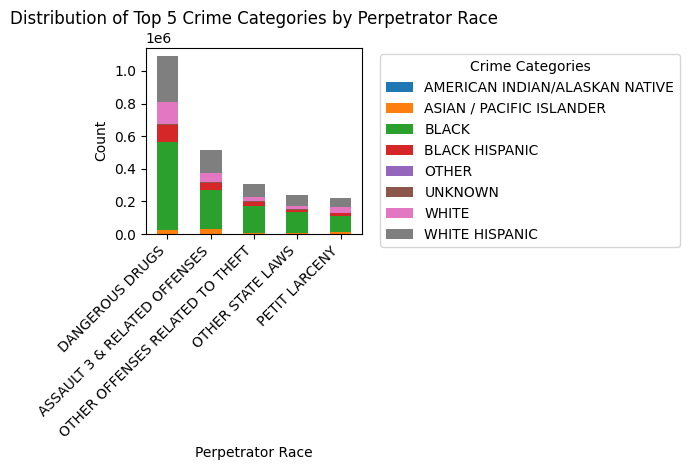

In [36]:
crime_race_counts = df.groupby(['OFNS_DESC', 'PERP_RACE']).size().unstack(fill_value=0)

# Select the top 5 crime categories
top_5_crimes = crime_race_counts.sum(axis=1).nlargest(5).index
filtered_data = crime_race_counts.loc[top_5_crimes]

# Create a stacked bar chart for the top 5 categories
plt.figure(figsize=(12, 8))
filtered_data.plot(kind='bar', stacked=True)
plt.title('Distribution of Top 5 Crime Categories by Perpetrator Race')
plt.xlabel('Perpetrator Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Crime Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame
# Sample 10% of the data randomly
sample_df = df.sample(frac=0.001, random_state=1)  # random_state for reproducibility

# Count occurrences of M and F in the sample
count_males = sample_df['PERP_SEX'].value_counts().get('M', 0)
count_females = sample_df['PERP_SEX'].value_counts().get('F', 0)

# Perform the z-test for proportions
count = [count_males, count_females]
nobs = [count_males + count_females, count_males + count_females]  # total observations for both categories

# Perform the z-test
z_stat, p_value = sm.stats.proportions_ztest(count, nobs)

# Output the results
alpha = 0.05  # Significance level
print("Z-statistic:", z_stat)
print("p-value:", p_value)

# Conclusion based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the counts of M and F.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the counts of M and F.")


Z-statistic: 66.7640074895097
p-value: 0.0
Reject the null hypothesis: There is a significant difference in the counts of M and F.


In [26]:
import pandas as pd
from scipy.stats import chisquare

# Assuming df is your DataFrame
# Sample 10% of the data randomly
sample_df = df.sample(frac=0.001, random_state=1)  # random_state for reproducibility

# Count occurrences of each race in the sample
observed_counts = sample_df['PERP_RACE'].value_counts()

# Here we assume equal distribution among the categories for simplicity
expected_counts = [len(sample_df) / len(observed_counts)] * len(observed_counts)

# Perform the Chi-squared goodness of fit test
chi2_stat, p_value = chisquare(observed_counts, f_exp=expected_counts)

# Output the results
alpha = 0.05  # Significance level
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)

# Conclusion based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the distribution of races.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of races.")


Chi-squared statistic: 8031.936792820914
p-value: 0.0
Reject the null hypothesis: There is a significant difference in the distribution of races.


In [25]:
import pandas as pd
from scipy.stats import chisquare

# Assuming df is your DataFrame
# Sample 10% of the data randomly
sample_df = df.sample(frac=0.001, random_state=1)  # random_state for reproducibility

# Count occurrences of crimes per month in the sample
observed_counts = sample_df['month'].value_counts().sort_index()

# Calculate expected count assuming equal distribution across 12 months
total_crimes = observed_counts.sum()
expected_counts = [total_crimes / 12] * 12  # Equal distribution across each month

# Perform the Chi-squared goodness of fit test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Output the results
alpha = 0.05  # Significance level
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)

# Conclusion based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in crime rates across months.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in crime rates across months.")


Chi-squared statistic: 31.32657042528287
p-value: 0.0009773594228333104
Reject the null hypothesis: There is a significant difference in crime rates across months.


In [43]:
import pandas as pd
from scipy.stats import chisquare

# Sample 10% of the DataFrame randomly
sample_df = df.sample(frac=0.001, random_state=1)  # random_state for reproducibility

# Filter for drug-related offenses in the sample
drug_offenses = sample_df[sample_df['OFNS_DESC'].str.contains('DRUG', case=False, na=False)]

# Count occurrences of drug offenses per year in the sample
observed_counts = drug_offenses['year'].value_counts().sort_index()

# If there are years with no offenses, fill in with zeros
years = df['year'].unique()
all_years_counts = observed_counts.reindex(years, fill_value=0)

# Calculate expected counts assuming no trend (equal distribution)
total_offenses = all_years_counts.sum()
expected_counts = [total_offenses / len(all_years_counts)] * len(all_years_counts)

# Perform the Chi-squared goodness of fit test
chi2_stat, p_value = chisquare(f_obs=all_years_counts, f_exp=expected_counts)

# Output the results
alpha = 0.05  # Significance level
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)

# Conclusion based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant trend in drug offenses over the years.")
else:
    print("Fail to reject the null hypothesis: There is no significant trend in drug offenses over the years.")



Chi-squared statistic: 258.9981549815498
p-value: 3.9442802015164504e-47
Reject the null hypothesis: There is a significant trend in drug offenses over the years.


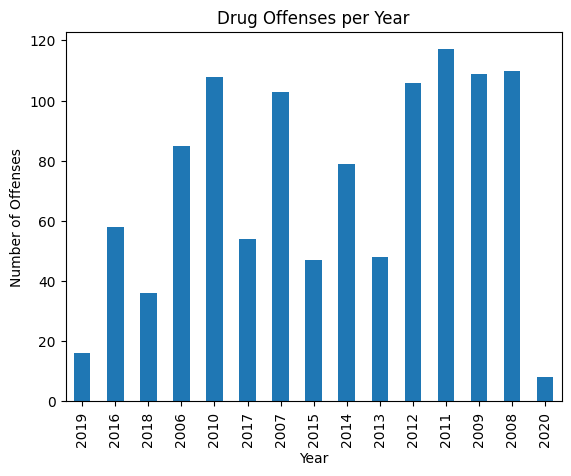

In [44]:
import matplotlib.pyplot as plt

# Plotting the observed counts of drug offenses per year
all_years_counts.plot(kind='bar', title='Drug Offenses per Year', xlabel='Year', ylabel='Number of Offenses')
plt.show()


In [46]:
import pandas as pd
from scipy.stats import chisquare

# Sample 10% of the DataFrame randomly
sample_df = df.sample(frac=0.001, random_state=1)  # random_state for reproducibility

# Filter for drug-related offenses in the sample
drug_offenses = sample_df[sample_df['OFNS_DESC'].str.contains('WEAPONS', case=False, na=False)]

# Count occurrences of drug offenses per year in the sample
observed_counts = drug_offenses['year'].value_counts().sort_index()

# If there are years with no offenses, fill in with zeros
years = df['year'].unique()
all_years_counts = observed_counts.reindex(years, fill_value=0)

# Calculate expected counts assuming no trend (equal distribution)
total_offenses = all_years_counts.sum()
expected_counts = [total_offenses / len(all_years_counts)] * len(all_years_counts)

# Perform the Chi-squared goodness of fit test
chi2_stat, p_value = chisquare(f_obs=all_years_counts, f_exp=expected_counts)

# Output the results
alpha = 0.05  # Significance level
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)

# Conclusion based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant trend in weapon offenses over the years.")
else:
    print("Fail to reject the null hypothesis: There is no significant trend in weapon offenses over the years.")



Chi-squared statistic: 15.650485436893206
p-value: 0.33518131226798437
Fail to reject the null hypothesis: There is no significant trend in weapon offenses over the years.


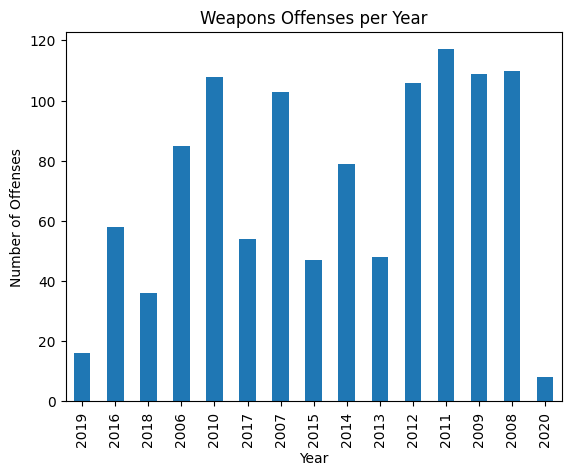

In [45]:
import matplotlib.pyplot as plt

# Plotting the observed counts of drug offenses per year
all_years_counts.plot(kind='bar', title='Weapons Offenses per Year', xlabel='Year', ylabel='Number of Offenses')
plt.show()


In [47]:
import pandas as pd
from scipy.stats import chisquare

# Sample 10% of the DataFrame randomly
sample_df = df.sample(frac=0.001, random_state=1)  # random_state for reproducibility

# Filter for drug-related offenses in the sample
drug_offenses = sample_df[sample_df['OFNS_DESC'].str.contains('FELONY', case=False, na=False)]

# Count occurrences of drug offenses per year in the sample
observed_counts = drug_offenses['year'].value_counts().sort_index()

# If there are years with no offenses, fill in with zeros
years = df['year'].unique()
all_years_counts = observed_counts.reindex(years, fill_value=0)

# Calculate expected counts assuming no trend (equal distribution)
total_offenses = all_years_counts.sum()
expected_counts = [total_offenses / len(all_years_counts)] * len(all_years_counts)

# Perform the Chi-squared goodness of fit test
chi2_stat, p_value = chisquare(f_obs=all_years_counts, f_exp=expected_counts)

# Output the results
alpha = 0.05  # Significance level
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)

# Conclusion based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant trend in felony offenses over the years.")
else:
    print("Fail to reject the null hypothesis: There is no significant trend in felony offenses over the years.")



Chi-squared statistic: 11.560747663551403
p-value: 0.6415317352035559
Fail to reject the null hypothesis: There is no significant trend in felony offenses over the years.


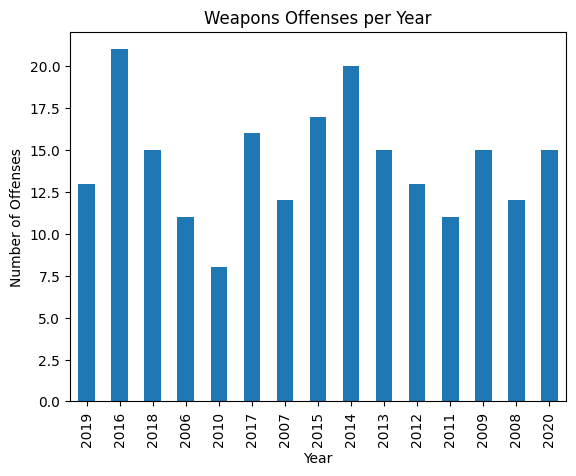

In [48]:
import matplotlib.pyplot as plt

# Plotting the observed counts of drug offenses per year
all_years_counts.plot(kind='bar', title='Weapons Offenses per Year', xlabel='Year', ylabel='Number of Offenses')
plt.show()
